Importando bibliotecas

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from ydata_profiling import ProfileReport
import numpy as np 

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from sklearn.metrics.pairwise import pairwise_distances
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score

In [71]:
url = (r'C:\Users\Gabriel-PC\Bootcamp-Data-science\Personal\8 - Aprendizado Supervisionado\Country-data.csv')

In [72]:
df = pd.read_csv(url)
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [73]:
df["country"].unique().size

167

In [74]:
# report_df = ProfileReport(df)
# report_df

In [75]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: >

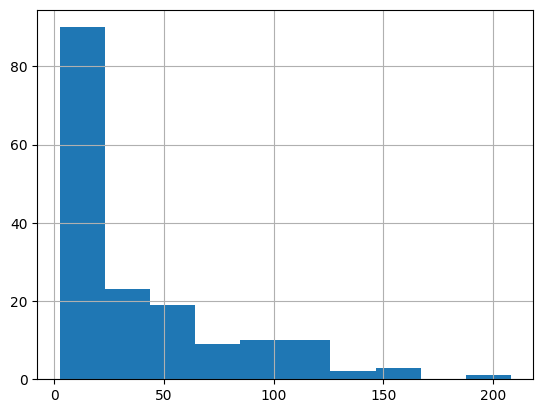

In [76]:
df[df.columns[1]].hist()

In [77]:
# fig, ax = plt.subplots(9, 1, sharex='col', sharey='row')
# count = 0
# for i in df.columns[1:]:
#     df[i].hist(ax=ax[count,1])
#     count = count + 1 

In [78]:
# fig, ax = plt.subplots(3, 3, sharex='col', sharey='row')
# m=1
# for i in range(3):
#     for j in range(3):

#         df.hist(column = df.columns[m], ax=ax[i,j], figsize=(40, 36))
#         m+=1

### Criando Modelos

#### Tratando dados

In [79]:
df_1 = df[df.columns[1:]]

df_1

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [80]:
# Padronização dos dados e criando modelo

Scaler = StandardScaler().fit(df_1)

In [81]:
X = Scaler.transform(df_1)

### K-Means

In [ ]:
# para definir a quantidade de clusters teria que fazer o loop  pedar a medida do elbo, para saber o cotovelo, mas no exercício já está passando

In [82]:
kmeans = KMeans(n_clusters= 3).fit(X)

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [83]:
y_kmeans = kmeans.predict(X)
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [84]:
silhouete_kmeans = silhouette_score(X, y_kmeans)

silhouete_kmeans

0.28329575683463126

In [85]:
dist_cent = kmeans.fit_transform(X)**2

dist_cent

c:\Users\Gabriel-PC\Bootcamp-Data-science\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([[  1.17959063,  33.4263992 ,  13.74546212],
       [ 12.9766085 ,  10.13805124,   0.70062052],
       [  9.81085648,  14.02034427,   2.0011834 ],
       [  5.14190122,  38.8766624 ,  18.69362974],
       [ 14.60131718,   6.25170839,   1.12898346],
       [ 13.60394296,  12.88004434,   4.68689944],
       [ 11.65707723,  14.24889347,   1.24345315],
       [ 29.56234093,   4.03043255,  12.78278558],
       [ 31.12141804,   0.88705572,  12.39082446],
       [  9.37581309,  12.6012245 ,   2.31876275],
       [ 15.689021  ,   3.650707  ,   2.84795197],
       [ 19.11499045,   4.10078928,   4.4662437 ],
       [  8.19768363,  20.7118433 ,   3.78148766],
       [ 15.03427453,   5.45357583,   1.5441977 ],
       [ 13.89447811,  10.68409766,   1.79323073],
       [ 32.03413802,   1.89804711,  13.49771119],
       [ 10.45618685,  11.53362859,   1.28306857],
       [  2.25665927,  32.3256368 ,  12.47467979],
       [  8.86872905,  13.73036832,   1.51476294],
       [  5.44942046,  15.57272

In [86]:
dist_cent_1 = dist_cent.sum(axis= 1)

dist_cent_1

array([ 48.35145195,  23.81528025,  25.83238414,  62.71219336,
        21.98200903,  31.17088674,  27.14942386,  46.37555906,
        44.39929822,  24.29580033,  22.18767998,  27.68202343,
        32.69101459,  22.03204806,  26.3718065 ,  47.42989633,
        23.27288401,  47.05697585,  24.1138603 ,  22.51520793,
        33.15426869,  24.99309517,  31.21696304,  66.70002001,
        22.86699059,  52.40243919,  60.31116781,  24.00850381,
        47.67002739,  45.65786063,  26.04999786,  80.78702915,
        70.49668061,  23.5604193 ,  28.09509071,  28.42711423,
        35.90815192,  59.99214521,  50.22731614,  30.2645823 ,
        46.01906795,  23.67918655,  29.77984587,  29.06773902,
        50.1694912 ,  21.28630787,  22.14258611,  25.15445688,
        22.28427327,  55.40981873,  44.90664088,  29.15575307,
        24.94261644,  36.91764416,  43.72002309,  33.67615164,
        36.99770061,  25.54335136,  43.11797317,  31.66228098,
        34.33908041,  22.4334713 ,  20.97048878,  47.66

In [87]:
df_1['dist'] = dist_cent_1

In [88]:
df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,dist
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,48.351452
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,23.815280
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,25.832384
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,62.712193
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,21.982009


In [89]:
df_1[df_1['cluster'] == 0]['dist'].min()

KeyError: 'cluster'

In [ ]:
df_1[df_1['cluster'] == 1]['dist'].min()

24.802020077251523

In [ ]:
df_1[df_1['cluster'] == 2]['dist'].min()

18.056235976427292

In [ ]:
uniq, counts = np.unique(y_kmeans, return_counts= True)

In [ ]:
uniq

array([0, 1, 2])

In [ ]:
counts

array([36, 47, 84], dtype=int64)

In [ ]:
df_1['cluster'] = y_kmeans

df_1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2


In [ ]:
df_1.groupby('cluster').size()

cluster
0    36
1    47
2    84
dtype: int64

#### Clusterização Hierárquica

In [105]:
hier_cust = AgglomerativeClustering(n_clusters= 3).fit(X)

In [106]:
y_hc = hier_cust.fit_predict(X)

y_hc

array([2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1,
       1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 2, 2, 1,
       2, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 2, 2, 1, 1, 2, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 0, 2, 1, 1,
       2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 2, 1, 1, 2, 1, 1, 1,
       1, 2, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2], dtype=int64)

In [107]:
y_kmeans

array([1, 2, 2, 1, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 0, 2, 1, 1, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 2, 0, 0,
       0, 2, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2, 2, 1, 1, 2,
       1, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1,
       1, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 1, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2,
       0, 0, 1, 1, 0, 2, 1, 2, 2, 2, 2, 2, 0, 0, 2, 2, 1, 2, 2, 1, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 0, 2, 2, 1, 2, 0, 0, 2, 1, 2, 1, 1, 2, 2, 2,
       2, 1, 2, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1])

In [108]:
silhouete_hc = silhouette_score(X, y_hc)

silhouete_hc

0.24563001303300652

In [109]:
silhouete_kmeans

0.28329575683463126

In [110]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

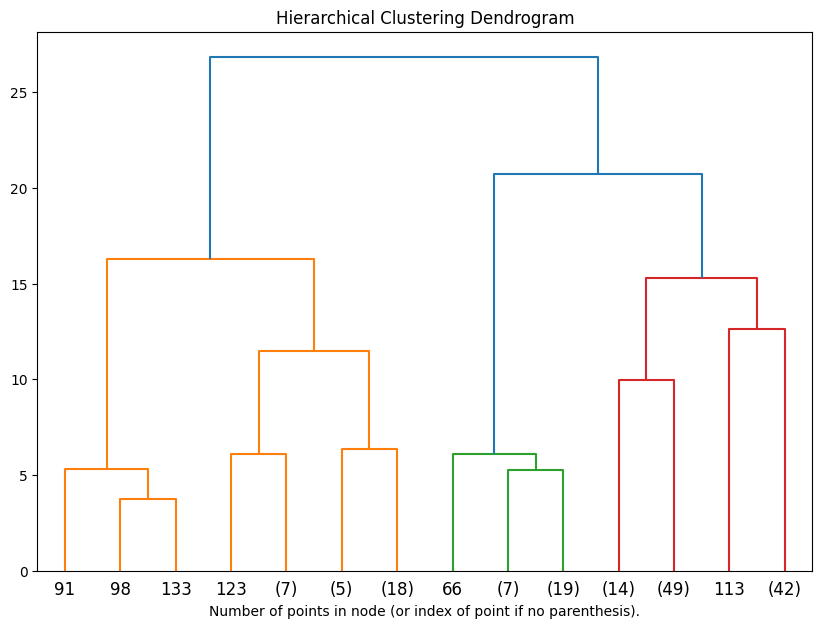

In [111]:

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(X)
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

### PCA

In [95]:
from sklearn.decomposition import PCA

In [91]:
df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [94]:
df_pca = df[df.columns[1:]]

df_pca

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [97]:
pca = PCA(n_components= 2).fit(df_pca)

projected = pca.transform(df_pca)

In [99]:
print(df_pca.shape)
print(projected.shape)

(167, 9)
(167, 2)


Text(0, 0.5, 'component 2')

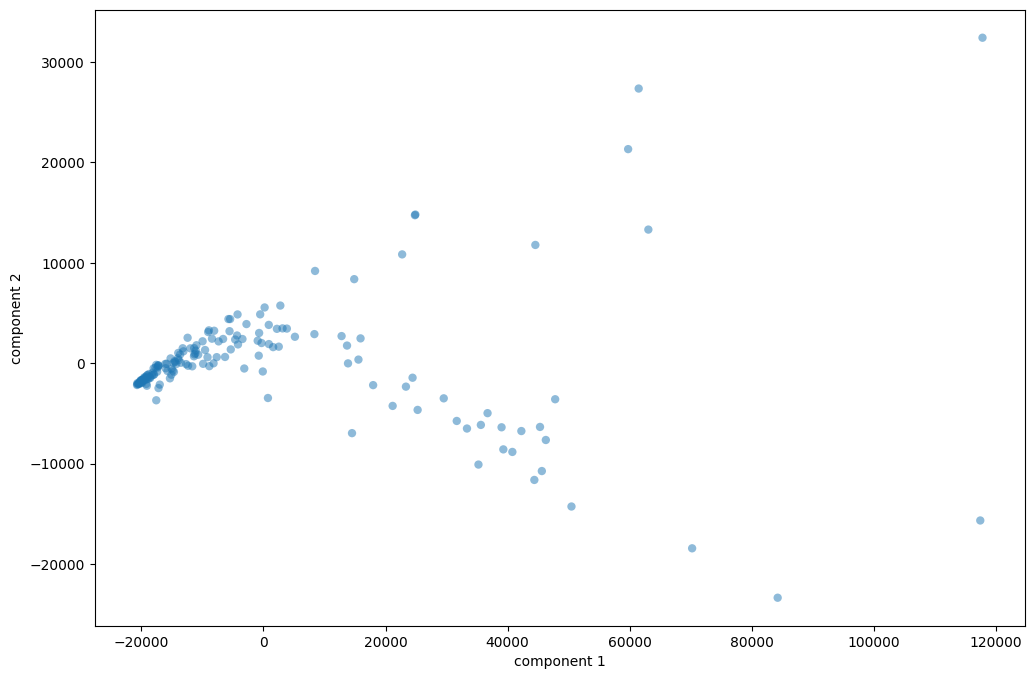

In [115]:
from matplotlib import figure
plt.figure(figsize=(12,8))
plt.scatter(projected[:, 0], projected[:, 1], edgecolor='none', alpha=0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
# plt.colorbar();

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_172\1092067088.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1],c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))


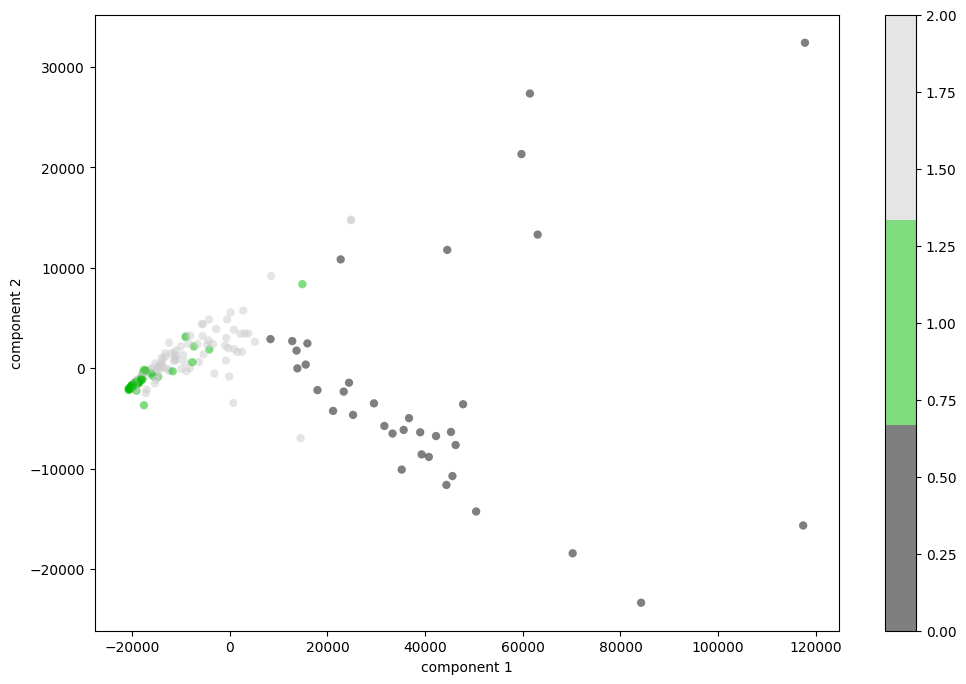

In [102]:
from matplotlib import figure
plt.figure(figsize=(12,8))
plt.scatter(projected[:, 0], projected[:, 1],c=y_kmeans, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

C:\Users\Gabriel-PC\AppData\Local\Temp\ipykernel_172\1724742382.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(projected[:, 0], projected[:, 1],c=y_hc, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))


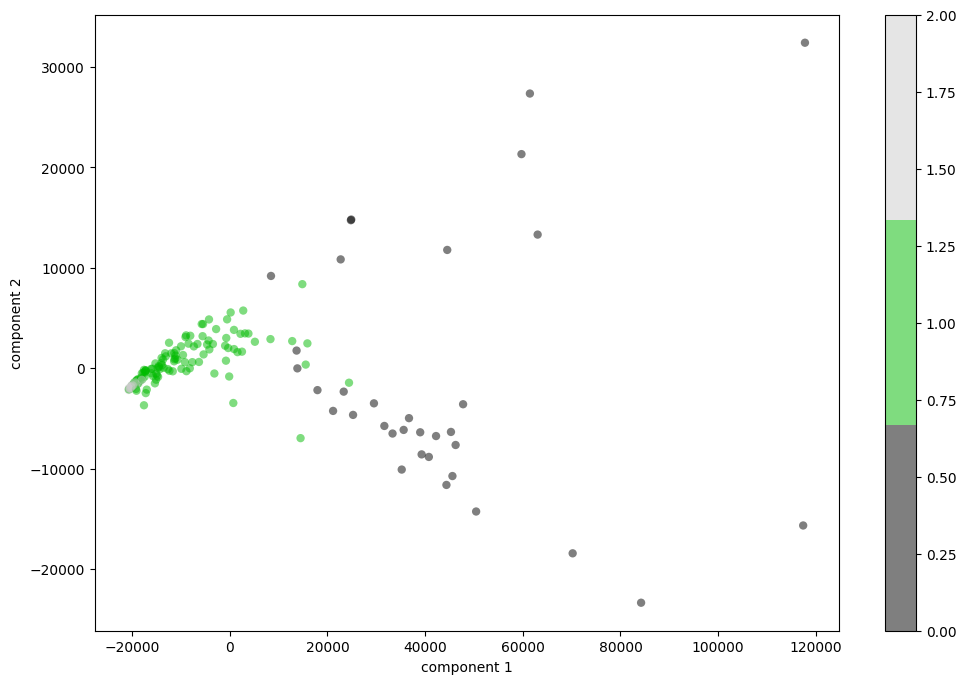

In [112]:
from matplotlib import figure
plt.figure(figsize=(12,8))
plt.scatter(projected[:, 0], projected[:, 1],c=y_hc, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

pca = PCA(2)  # project from 64 to 2 dimensions
pca.fit(digits.data-np.mean(digits.data))
projected = pca.transform(digits.data)
print(digits.data.shape)
print(projected.shape)


projected = pca.transform(digits.data)
from matplotlib import figure


plt.figure(figsize=(12,8))
plt.scatter(projected[:, 0], projected[:, 1],c=digits.target, edgecolor='none', alpha=0.5,cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


https://projector.tensorflow.org/